In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

## MCTS Planners return distribution

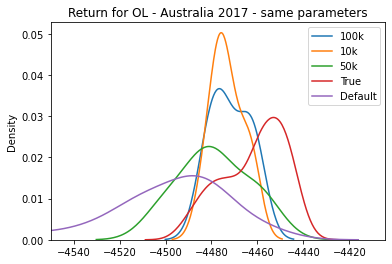

In [4]:

ol_uct_offline_scores_100k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-12_16-17-19/results.npy")
ol_uct_offline_scores_10k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-12_10-24-54/results.npy")
ol_uct_offline_scores_50k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-13_11-32-52/results.npy")

# ol_uct_offline_scores_1 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-03_09-47-13/results.npy")
# ol_uct_offline_scores_2 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-04_17-27-59/results.npy")
# ol_uct_offline_scores_3 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-03_09-47-26/results.npy")
#ol_uct_offline_scores_4 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-30_15-44/results.npy")

true_strategy_scores = np.load("../data/RaceStrategy-v2/human_policy/results_unnorm_aus.npy")
default_strategy_scores = np.load("../data/RaceStrategy-v2/default_policy/results_unnorm_aus.npy")

fig = plt.figure()
sns.distplot(ol_uct_offline_scores_100k, label='100k', hist=False)
sns.distplot(ol_uct_offline_scores_10k, label='10k', hist=False)
sns.distplot(ol_uct_offline_scores_50k, label='50k', hist=False)
# sns.distplot(ol_uct_offline_scores_1, label='c=1, csi=5', hist=False)
# sns.distplot(ol_uct_offline_scores_2, label='c=2,5, csi=1', hist=False)
# sns.distplot(ol_uct_offline_scores_3, label='c=1, csi=2,5', hist=False)
#sns.distplot(ol_uct_offline_scores_4, label='c=1, csi=1', hist=False)

sns.distplot(true_strategy_scores, label='True', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
plt.title('Return for OL - Australia 2017 - same parameters')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_100000_sch_aus_2017_budget_comparison_unnorm.jpg')
plt.xlim(left=-4550)
plt.show()




In [3]:
ol_uct_offline_scores_1_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-31/results.npy")
ol_uct_offline_scores_2_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-34/results.npy")
ol_uct_offline_scores_3_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-35/results.npy")

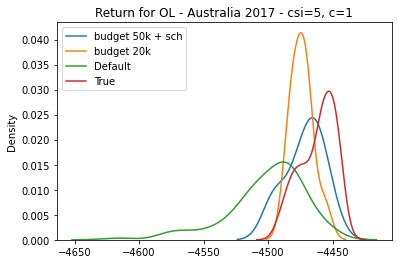

In [4]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_1, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_1_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=5, c=1')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set1_aus_2017_comparison_unnorm')
plt.show()




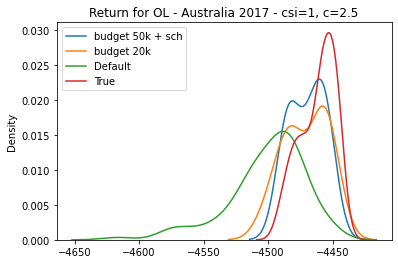

In [5]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_2, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_2_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=1, c=2.5')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set2_aus_2017_comparison_unnorm')
plt.show()

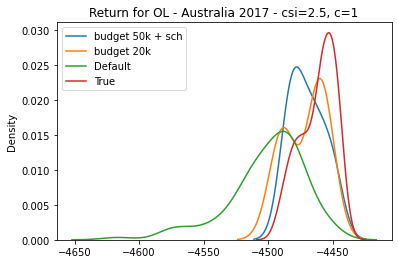

In [6]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_3, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_3_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=2.5, c=1')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set3_aus_2017_comparison_unnorm')
plt.show()

## csi parameter evaluation

In [23]:
set_1 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_16-18-19/results.npy")
set_2 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_16-49-22/results.npy")
set_3 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_17-20-45/results.npy")
set_4 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_17-50-32/results.npy")
set_5 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_18-22-30/results.npy")
set_6 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_18-53-59/results.npy")


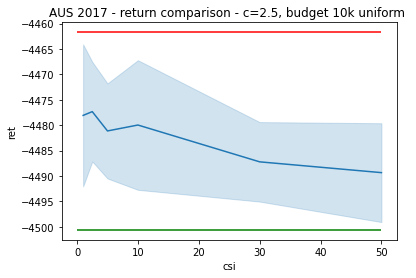

In [36]:
set_list = [set_1, set_2, set_3, set_4, set_5, set_6]
csi_list = [1, 2.5, 5, 10, 30, 50]
df_list = []
for s, csi in zip(set_list, csi_list):
    df_list.append(pd.DataFrame({"ret": s, "csi": csi}))
df = pd.concat(df_list)

plt.figure()
plt.title("AUS 2017 - return comparison - c=2.5, budget 10k uniform ")
sns.lineplot(x="csi", y="ret", data=df, ci="sd")
plt.hlines(y=[np.mean(true_strategy_scores), np.mean(default_strategy_scores)], xmin=[0,0], xmax=[50,50], colors=["red", "green"])
plt.savefig("../figures/ol_uct_csi_comparison_AUS_2017_10000b_uniform")


## TRPO return distribution

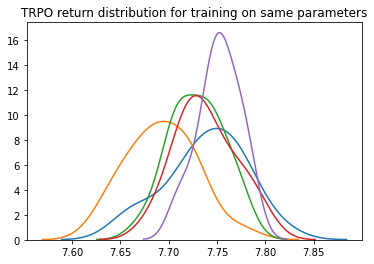

In [3]:
trpo_logs_folder = "../data/RaceStrategy-v2/trpo_2_32_0.001_201e/logs/"
training_scores = []

for dir in os.scandir(trpo_logs_folder):
    training_scores.append(np.load(dir.path + "/final_evaluation_scores.npy", allow_pickle=True))

plt.figure()
for data in training_scores:
    sns.distplot(data, hist=False)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()

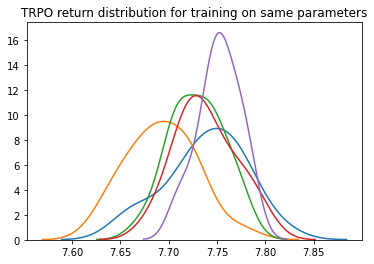

In [9]:
trpo_logs_folder = "../data/RaceStrategy-v2/trpo_2_32_0.001_201e/logs/"
training_scores = []

for dir in os.scandir(trpo_logs_folder):
    training_scores.append(np.load(dir.path + "/final_evaluation_scores.npy", allow_pickle=True))

plt.figure()
for data in training_scores:
    sns.distplot(data, hist=False)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()

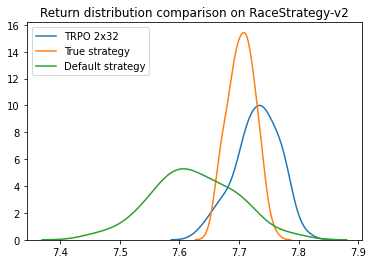

In [10]:
full_scores = np.hstack(training_scores)
plt.figure()
plt.title("Return distribution comparison on RaceStrategy-v2")
sns.distplot(full_scores, hist=False, label="TRPO 2x32")
sns.distplot(true_strategy_scores, hist=False, label="True strategy")
sns.distplot(default_strategy_scores, hist=False, label = "Default strategy")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_comparison_2x32_5tr.png')
plt.show()

## TRPO training curves

[array([7.50119862, 7.49782298, 7.50831369, 7.51434924, 7.4995782 ,
       7.50735866, 7.50477166, 7.49736818, 7.50685504, 7.51087755,
       7.50935678, 7.50016438, 7.51253863, 7.49200684, 7.505911  ,
       7.52012773, 7.51325715, 7.49534052, 7.51132003, 7.50435738,
       7.50390335, 7.50454457, 7.50963123, 7.50690953, 7.52124046,
       7.51153791, 7.50198579, 7.49951297, 7.49403015, 7.50457377,
       7.51507311, 7.51213507, 7.49625036, 7.51036115, 7.50320857,
       7.51648955, 7.52423067, 7.5072741 , 7.49972709, 7.51222246,
       7.50942443, 7.50433333, 7.52483394, 7.51045331, 7.51386529,
       7.51066544, 7.50989436, 7.50994004, 7.51637092, 7.50846557,
       7.51694505, 7.50550895, 7.51318934, 7.5049642 , 7.50565835,
       7.51308725, 7.50716116, 7.50277033, 7.52106597, 7.5206327 ,
       7.50540066, 7.50656701, 7.51488545, 7.52608663, 7.50375473,
       7.50432677, 7.51778779, 7.50837407, 7.52116801, 7.51037597,
       7.52896206, 7.51508284, 7.51631723, 7.50786711, 7.5122

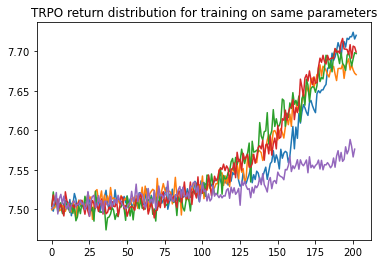

In [6]:
training_data_path = "../data/RaceStrategy-v2/trpo_2_32_0.001/models"

online_scores = []

for dir in os.scandir(training_data_path):
    online_scores.append(np.load(dir.path + "/online_scores.npy", allow_pickle=True))

plt.figure()
print(online_scores)
for data in online_scores:
    sns.lineplot(data=data)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()